In [4]:
# In this project you will learn linear regression
# load ../../stanford_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

# %config InineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [5]:
# WarmUpExercise
def warmUpExercise():
    return(np.identity(5))


In [7]:
# Linear Regression with one variable
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

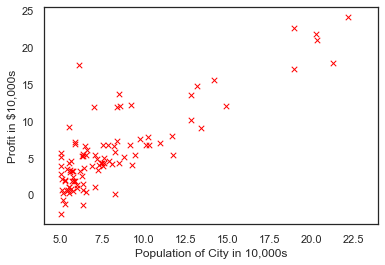

In [8]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s");

In [9]:
# Gradient Descent
def computeCost(X, y, theta=[[0], [0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return J

In [10]:
computeCost(X,y)

32.072733877455676

In [13]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return (theta, J_history)

theta:  [-3.63029144  1.16636235]


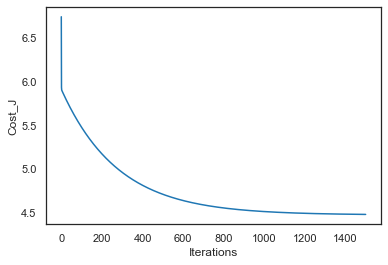

In [14]:
# theta for minimized cost J
theta, Cost_J = gradientDescent(X,y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel("Iterations");

TypeError: fit() missing 1 required positional argument: 'y'

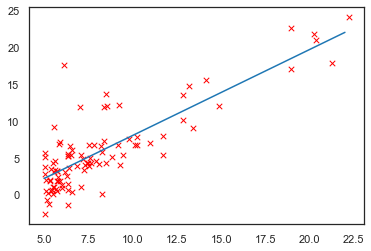

In [17]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

#plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label="Linear regression (Gradient descent)")

# Compare with scikit-learn linear regression
regr = LinearRegression
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.legend(loc=4)